In [23]:
import numpy as np
max_dist_from_goal = 100
x = np.arange(-100, 150, 1)
y = np.clip(1 - (np.log(x/ max_dist_from_goal) / np.log(
            5 / max_dist_from_goal)), -1, 1)

/tmp/ipykernel_1743346/2511889577.py:4: RuntimeWarning: divide by zero encountered in log
  y = np.clip(1 - (np.log(x/ max_dist_from_goal) / np.log(
/tmp/ipykernel_1743346/2511889577.py:4: RuntimeWarning: invalid value encountered in log
  y = np.clip(1 - (np.log(x/ max_dist_from_goal) / np.log(


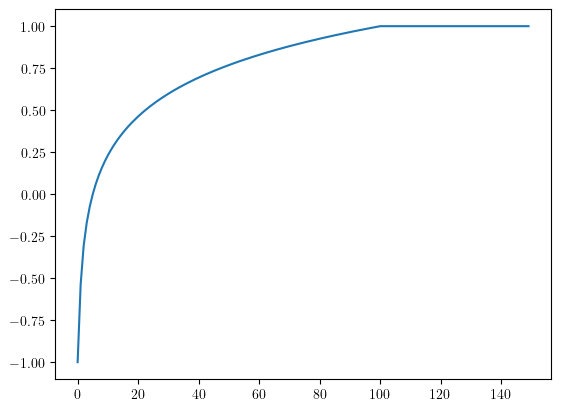

In [24]:
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.show()

In [25]:
def log_precision(x, x_goal=0.8, x_max=16) -> float:

    epsilon = 0.001  # Protection against log(0.0)
    return 1 - np.clip((np.log(max(x, epsilon) / x_max) / np.log(max(x_goal, epsilon) / x_max)), 0, 1)
x = np.arange(-20, 20, 1)
y = np.array([-log_precision(i) for i in x])

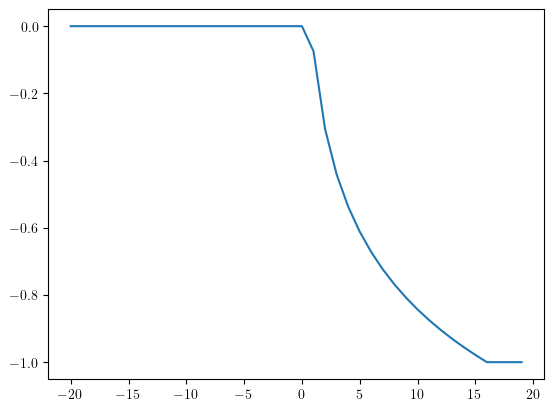

In [26]:
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.show()

In [27]:
# def asymmetric_l2_loss(u, tau):
#     return torch.mean(torch.abs(tau - (u < 0).float()) * u**2)

In [28]:
import numpy as np
import torch
def asymmetric_l2_loss(u, tau):

    return (torch.abs(tau - (u < 0).float()) * u**2)

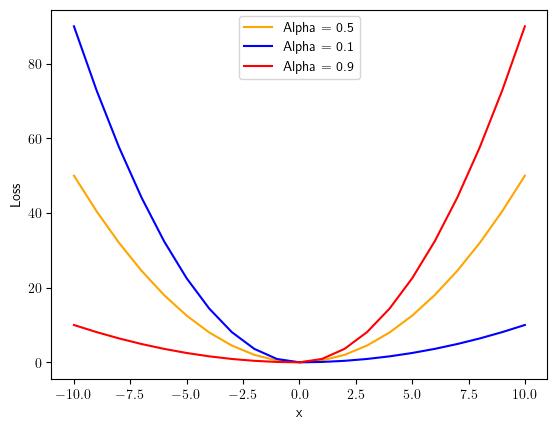

In [29]:
x = torch.tensor(np.arange(-10, 11, 1))
y = np.array([asymmetric_l2_loss(i,0.5) for i in x])
y2 = np.array([asymmetric_l2_loss(i,0.1) for i in x])
y3 = np.array([asymmetric_l2_loss(i,0.9) for i in x])
import matplotlib.pyplot as plt

plt.plot(x.numpy(), y,  label='Alpha = 0.5',color='orange',)
plt.plot(x.numpy(), y2, label='Alpha = 0.1',color='blue',)
plt.plot(x.numpy(), y3, label='Alpha = 0.9',color='red',)

plt.xlabel('x')
plt.ylabel('Loss')
plt.legend()
plt.savefig('asymmetric_l2_loss.png')

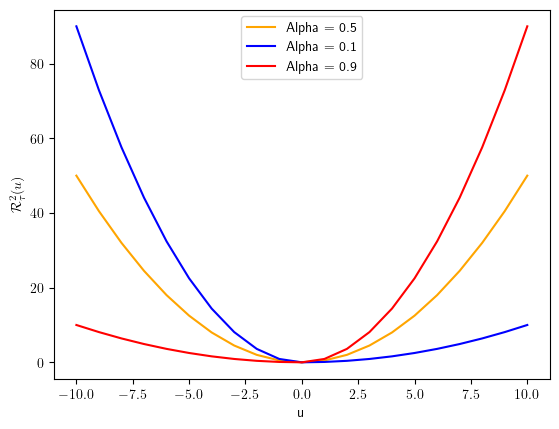

In [33]:
x = torch.tensor(np.arange(-10, 11, 1))
y = np.array([asymmetric_l2_loss(i,0.5) for i in x])
y2 = np.array([asymmetric_l2_loss(i,0.1) for i in x])
y3 = np.array([asymmetric_l2_loss(i,0.9) for i in x])
import matplotlib.pyplot as plt
plt.rcParams["text.usetex"] = True
plt.plot(x.numpy(), y,  label='Alpha = 0.5',color='orange',)
plt.plot(x.numpy(), y2, label='Alpha = 0.1',color='blue',)
plt.plot(x.numpy(), y3, label='Alpha = 0.9',color='red',)

plt.xlabel('u')
plt.ylabel(r'$\mathcal{R}_{\tau}^{2}(u)$')
plt.legend()
plt.savefig('asymmetric_l2_loss_.png')

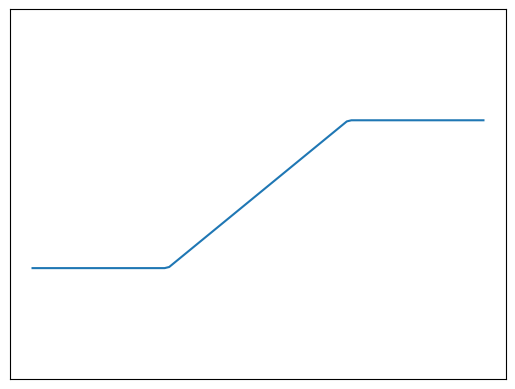

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def clip(x, epsilon):
    return np.clip(x, 1 - epsilon, 1 + epsilon)

x = np.linspace(0.5, 1.5, 100)
epsilon = 0.2
y = clip(x, epsilon)

plt.plot(x, y)
plt.axis('on')

# plt.xlabel('x')
# plt.ylabel('Clipped Value')
# plt.title(f'Clip Function with Epsilon = {epsilon}')
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
plt.ylim(0.5, 1.5)
plt.grid(False)
# plt.show()
plt.savefig('clip.png')

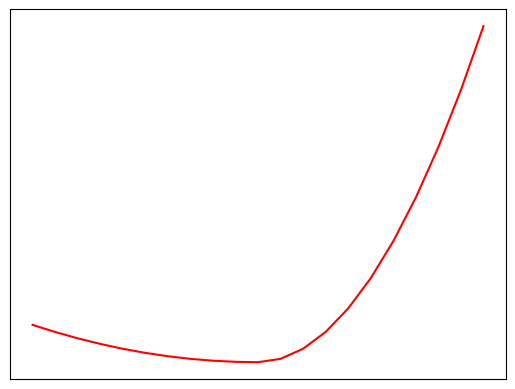

In [32]:
x = torch.tensor(np.arange(-10, 11, 1))
y = np.array([asymmetric_l2_loss(i,0.5) for i in x])
y2 = np.array([asymmetric_l2_loss(i,0.1) for i in x])
y3 = np.array([asymmetric_l2_loss(i,0.9) for i in x])
import matplotlib.pyplot as plt

# plt.plot(x.numpy(), y,  label='Alpha = 0.5',color='orange',)
# plt.plot(x.numpy(), y2, label='Alpha = 0.1',color='blue',)
plt.plot(x.numpy(), y3, label='Alpha = 0.9',color='red',)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
# plt.xlabel('x')
# plt.ylabel('Loss')
# plt.legend()
plt.savefig('exceptile.png')

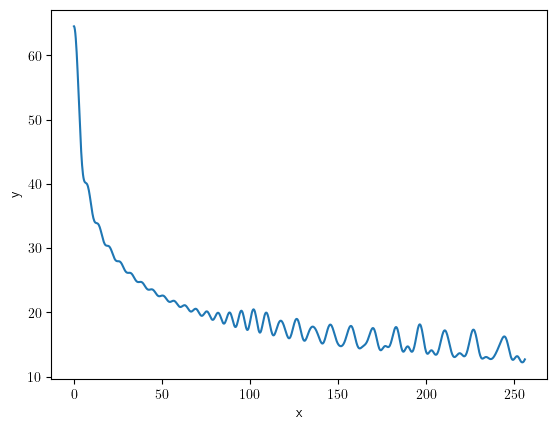

In [39]:
import numpy as np
import matplotlib.pyplot as plt

d = 256

def theta(t):
    return 10000**(-2*t/d)

def f(m):
    result = 0
    for j in range(int(d/2)):
        inner_sum = 0
        for i in range(j+1):
            inner_sum += np.exp(1j*m*theta(i))
        result += np.abs(inner_sum)
    return result / (d/2)

m_values = np.linspace(0, 256, 1000)
f_values = np.vectorize(f)(m_values)

plt.plot(m_values, f_values)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('rubbish.png')
plt.show()